<a href="https://colab.research.google.com/github/brunobro/ponderacao-de-modelos-de-classificacao-pela-analise-hierarquica-de-processos/blob/main/MI_AHPSelecaoModelosClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seleção/Ponderação de Modelos de Classificação pela Análise Hierárquica de Processos**

**Diversidade** é um tema essencial em Aprendizado de Máquina. 

Cada algoritmo aprende modelos diferentes sobre uma mesma base de dados, devido à:

*   Parâmetros aleatórios de inicialização
*   Amostras diferentes selecionadas para aprendizados
*   Atributos diferentes utilizados
*   Estrutura interna do algoritmo

Para aproveitar o melhor de cada modelo recorre-se a técnica de Comitê de Máquinas (Ensemble).



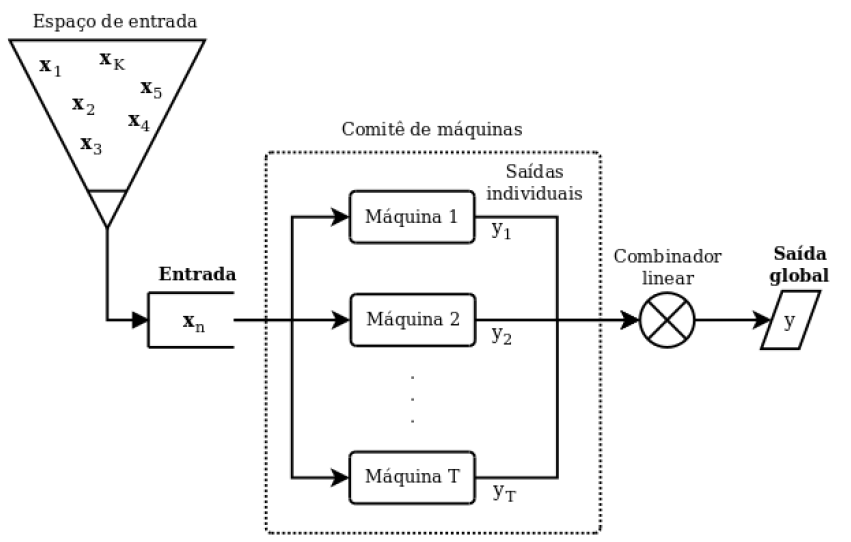

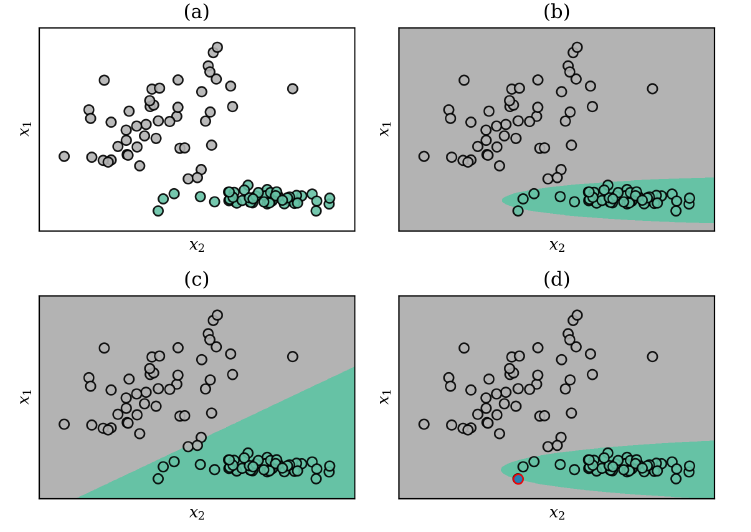

**#1 Diversidade dos Modelos**

Há três principais razões pelas quais o Ensemble é melhor que os modelos individuais [1] em certas circunstâncias:

1.   <u>Estatística:</u> os algoritmos têm por princípio a procura de uma determinada hipótese $h$ que explique o relacionamento das amostras de entrada e saída, em um espaço de hipóteses $H$. Quando as amostras fornecidas não são sufientes para obter uma boa hipótese, o algoritmo pode convergir para hipóteses distintas sendo que cada uma delas fornece sua própria acurácia. Mesmo que eslas tenham acurácias próximas, isso não significa que os modelos classificam na mesma classe um mesmo exemplo, mas que distintos máquinas (modelos) erram e acertam aproximadamente a mesma quantidade de vezes. É neste sentido que, ao implementar um comitê de máquinas, atenua-se as predições errôneas, exceto quando a maior parte das modelos falham.

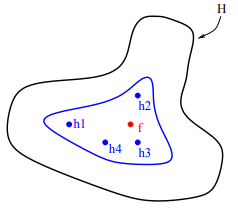

2.   <u>Computacional:</u> Visto que o espaço de hipóteses $H$ é amplo, os algoritmos tendem à soluções locais dos problemas, ou seja, é comum que os algoritmos convirjam para mínimos (máximos) locais. Assim, dependendo de condições iniciais de inicialização os mesmos algoritmos podem convergir para soluções distintas, sem garantia que seja a solução ótima do espaço de hipóteses $H$. Logo, a agregação de vários modelos supera os resultados de uma máquina solitária, porque algumas delas podem convergir para pontos extremos locais que estão mais próximos dos globais do que outros modelos, melhorando então as predições.



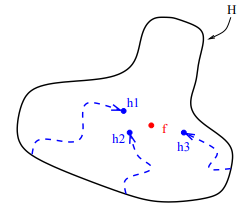


3.   <u>Representativa:</u> Muitos algoritmos de aprendizado de máquina possuem uma limitação implícita em relação ao espaço de hipóteses tangível, logo eles somente têm a capacidade de estimar funções dentro de um subconjunto do espaço de hipóteses $H$. Este é o caso daqueles algoritmos que somente podem separar classes linearmente separáveis. Desta maneira, ao combinar diferentes máquinas, que utilizam distintos subconjuntos do espaço de hipóteses para suas buscas, melhora-se a capacidade de predição global.

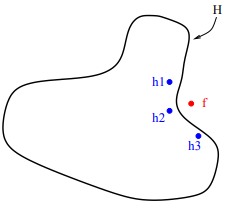

**#2 Subespaço de atributos**

- Um outro contexto onde a utilização do comitê de máquinas é necessária, é quando o conjunto de atributos pode ser agrupado por <u>características similares</u>. 

- Ou quando o custo computacional para treinar modeloes em bases de dados com centenas de milhares de atributos (<u>big data</u>) se torna inviável, devido ao consumo de memória excessivo.

Isso pode ser evitado, particionando o espaço de atributos.

Por exemplo, o tratamento de um paciente pode ser decidido analisando exames de sangue, de imagem, ultrasons, dentre outros. 

Assim, cada modelo pode se especializar em um determinado subespaço de atributos.

**Votação**

A combinação das predições geralmente é feita por

<u>Votação Rígida:</u> A classe mais predita é selecionada

$$v_0(x)=\sum_{q=1}^{Q} \omega_q \left\lbrace \begin{array}{lr} 1, \psi_q(x) = 0\\0, \textrm{caso contrário} \end{array}\right.$$

$$v_1(x)=\sum_{q=1}^{Q} \omega_q \left\lbrace \begin{array}{lr} 1, \psi_q(x) = 1\\0, \textrm{caso contrário} \end{array}\right.$$

$$\hat{y} = \arg\max_{C} \lbrace v_C(x) \rbrace$$

onde $Q$ é a quantidade de modelos, $\omega_q$ é o peso do $q$-ésimo modelo, tal que $\sum_{q=1}^{Q} \omega_q = 1$, e $\psi_q(x)$ retorna a classe predita $C \in \lbrace 0,1 \rbrace$ pelo $q$-ésimo modelo para a amostra $x$ e $\hat{y}$ é a classe predita.

<u>Votação Suave:</u> A classe com maior probabilidade é selecionada

$$\hat{y} = \arg\max_{C} \lbrace \dfrac{1}{Q} \sum_{q=1}^{Q}  \omega_q p_{q}(C|x) \rbrace$$

onde $p_{q}(C|x)$ é a probabilidade da amostra $x$ ser da classe $C$.



**Peso dos Modelos**

Algumas abordagens para calcular o pesos dos modelos.



*   **Best-worst Weighted Vote (BWWV)**

$$
\omega_q = 1 - \frac{e_q - \min(e)}{\max(e) - \min(e)}
$$

onde $e_q$ é o número de erros do $q$-ésimo classificador e $e$ é o vetor com todos os erros.

*   **Accuracy Proportion (AP)**

$$
\omega_q = \frac{Acc_{q}}{\sum_{i=1}^{Q} Acc_{i}}
$$

onde $Acc_{q}$ é a acurácia do $q$-ésimo classificador. 

A acurácia é definida em função dos falsos positivos (FP) e negativos (FN) e verdadeiros positivos (TP) e negativos (TN), assim:

$$
Acc = \frac{TP + TN}{TP + FP + TN + FN}
$$

Outras métricas que serão utilizadas são Precisão (Pr) e Recobrimento (Re), assim definidas:

$$
Pr = \frac{TP}{TP + FP}
$$

$$
Re = \frac{TP}{TP + FN}
$$


# Obtendo os pesos dos modelos pela Análise Hierárquica de Processos (AHP)

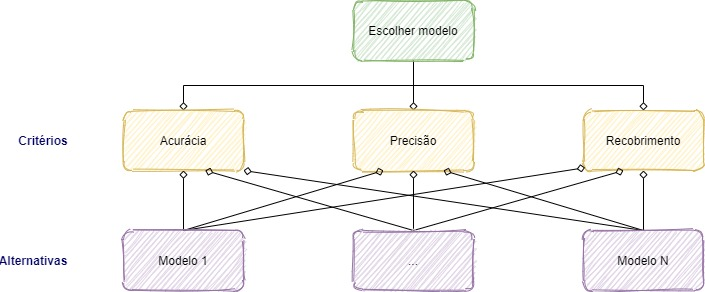

**O algoritmo empregando AHP consiste dos seguintes passos:**


1.   Calcula as métricas Acurácia, Precisão e Recobrimento de cada modelo;
2.   Atribui pesos as métricas no vetor $w$, onde $w_1$, $w_2$ e $w_3$ são referentes a Acurácia, Precisão e Recobrimento, respectivamente.
3.   Monta uma matriz $A = (a_{ij})$ com as métricas, onde cada linha tem as métricas do modelo, isto é: $a_{ij}$ é o valor da métrica $j$ do modelo $i$, sendo que $j=1,2,3$.
4. Normaliza a matriz $A$, ou seja $A / ||A||_1$, para que suas colunas somem 1, empregando a norma $1$, isto é:

$$
||A||_1 = \max_{1 \leq j \leq n} \left ( \sum_{i=1}^{n} |a_{ij}| \right)
$$

5. Faz o produto vetorial $u = A w^{T}$ para obter os pesos dos modelos.

**Exemplo:**
Considere os resultados conforme Tabela a seguir:
<table>
<tr><td></td><td>Acc</td><td>Pr</td><td>Re</td></tr>
<tr><td>Modelo 1</td><td>0.60</td><td>0.58</td><td>0.76</td></tr>
<tr><td>Modelo 2</td><td>0.52</td><td>0.32</td><td>0.83</td></tr>
<tr><td>Modelo 3</td><td>0.68</td><td>0.70</td><td>0.58</td></tr>
</table>

Atribuímos os mesmos pesos às métricas: $w = [0.33, 0.33, 0.33]$;

A matriz $A$ será:

$$
A = \left[ \begin{matrix} 0.60 & 0.58 & 0.76\\ 0.52 & 0.32 & 0.83\\ 0.68 & 0.70 & 0.58\end{matrix} \right]
$$

Após a normalização temos:

$$
A' = \left[ \begin{matrix} 0.33 & 0.36 & 0.35\\ 0.29 & 0.20 & 0.38\\ 0.38 & 0.44 & 0.27\end{matrix} \right]
$$

Por fim, calculamos o produto vetorial

$$
u = \left[ \begin{matrix} 0.33 & 0.36 & 0.35\\ 0.29 & 0.20 & 0.38\\ 0.38 & 0.44 & 0.27\end{matrix} \right] \left[ \begin{matrix} 0.33 \\ 0.33\\ 0.33\end{matrix} \right] = \left[ \begin{matrix} 0.3432 \\ 0.2871 \\ 0.3597\end{matrix} \right]
$$

# **Codificação**

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import pandas as pd

#Para criação dos dados e separação
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Métricas a serem calculadas para os modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, zero_one_loss

#Algoritmos para classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

#Para combinar os algoritmos
from sklearn.ensemble import VotingClassifier

**Definição de algumas funções**

In [ ]:
'''
Aqui definimos os dois métodos para cálculo dos pesos de cada modelo de classificação
'''

#Para normalização dos pesos
def normalize(x):
    return x/np.linalg.norm(x, 1)

'''
Best-worst weighted vote (BWWV)
'''
def BWWV(errors):
    '''
    errors: list/array erros de todos os classificadores
    Utilizar from sklearn.metrics import zero_one_loss
    '''
    errors = np.array(errors)
    mi = min(errors)
    d  = max(errors) - mi
    return normalize(1 - ((errors - mi) / d))
 
'''
Accuracy Proportion  (AP)
'''
def AP(accs):
    '''
    accs: list/array accuracy de todos os classificadores
    '''
    accs = np.array(accs)
    return normalize(accs/np.sum(accs))

'''
Pesos pelo método AHP
'''
def AHP(A, w = np.array([1, 1, 1, 1])):
    '''
    w: pesos dos critérios (métricas)
    A: matriz com os valores das métricas onde cada linha representa os valores
    de um modelo particular
    '''
    w = normalize(w)
    A = A/np.linalg.norm(A, 1, axis=0) #normaliza a matriz
    u = normalize(A @ w.T) #Produto vetorial normalizado
    return u

'''
Calcula as métricas de predição
'''
def metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    pr  = precision_score(y_test, y_pred, average='macro')
    re  = recall_score(y_test, y_pred, average='macro')
    er  = zero_one_loss(y_test, y_pred, normalize=False)

    print('Acc: %.4f' %acc)
    print('Pr: %.4f' %pr)
    print('Re: %.4f' %re)
    print('Err: %d' %er)
    
    return acc, pr, re, er

'''
Função para treinar um classificar, fazer as predições e calcular todas as métricas
'''
def fit_predict(X_train, X_test, y_test, y_train, clf, txt):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(txt)
    
    return metrics(y_test, y_pred)

**Base de dados artificial**

In [ ]:
'''
Cria um conjunto de dados artificiais para classificação
'''

#Fixa a quantidade de amostras, features e classes
N_SAMPLES  = 100000
N_FEATURES = 10
N_CLASSES  = 4

#Cria os dados
X, y = make_classification(
        n_samples=N_SAMPLES, 
        n_features=N_FEATURES, 
        n_informative=N_FEATURES, 
        n_classes=N_CLASSES, 
        n_redundant=0, 
        random_state=0)

#Separa em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Abordagem 1:** Mesmos algoritmos com hiperparâmetros distintos

In [ ]:
'''
Exemplo de modelos com estrutura interna distinta
Neste caso os modelos aprendem sobre o mesmo conjunto de dados
E utilizam o mesmo algoritmo, mas com hiperparâmetros distintos
'''

#Para armazenar todos os resultados
RESULTADOS1 = []

#Defini os hiperparâmetros dos classificadores
clf1 = KNeighborsClassifier(n_neighbors=5) 
clf2 = KNeighborsClassifier(n_neighbors=30) 
clf3 = KNeighborsClassifier(n_neighbors=80) 

#Cria um dicionário com os nomes dos classficadores
dc = {'KNN k=5': clf1, 'KNN k=30': clf2, 'KNN k=80': clf3}

#Calcula as métricas dos classificadores e os armazena na lista clfs
clfs   = []
accs   = []
prs    = []
res    = []
errors = []

for txt, clf in dc.items():
    clfs.append((txt, clf))
    acc, pr, re, er = fit_predict(X_train, X_test, y_test, y_train, clf, txt)
    RESULTADOS1.append([txt, acc, pr, re, er])
    accs.append(acc)
    prs.append(pr)
    res.append(re)
    errors.append(er)
    print('\n')

KNN k=5
Acc: 0.9392
Pr: 0.9393
Re: 0.9392
Err: 1825


KNN k=30
Acc: 0.9342
Pr: 0.9346
Re: 0.9342
Err: 1975


KNN k=80
Acc: 0.9240
Pr: 0.9248
Re: 0.9241
Err: 2279




In [ ]:
'''
Calcula os pesos considerando os métodos mencionados anteriormente
'''

#Metodologias clássicas
w_BWWV = BWWV(errors)
w_AP  = AP(accs)

#Metodologia proposta
errors_inv = list(1/np.array(errors)) #Altera os erros para que seja considerado quanto mais pior
A          = np.array([accs, prs, res, errors_inv]).T
u_AHP      = AHP(A, np.array([1, 1, 1, 10])) #fixa, para a métrica que mede os erros, o peso 10 vezes mais

print('Pesos')
print('BWWV: ', np.round(w_BWWV, 4))
print('AP : ', np.round(w_AP, 4))
print('AHP : ', np.round(u_AHP, 4))

Pesos
BWWV:  [0.5989 0.4011 0.    ]
AP :  [0.3357 0.3339 0.3303]
AHP :  [0.3598 0.3379 0.3023]


In [ ]:
'''
Emprega os Ensembles com e sem os pesos
'''

#Emprega Ensemble no modo suave sem considerar os pesos dos classificadores
voting = VotingClassifier(estimators=clfs, voting='soft')
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print('\nEnsemble - Suave - Sem pesos')
acc_, pr_, re_, zol_ = metrics(y_test, y_pred)

RESULTADOS1.append(['Ensemble suave sem pesos', acc_, pr_, re_, zol_])

#Implementa o Ensemble com pesos obtidos pelo método BWWV
voting_BWWV = VotingClassifier(estimators=clfs, voting='soft', weights=list(w_BWWV))
voting_BWWV.fit(X_train, y_train)
y_pred_BWWV = voting_BWWV.predict(X_test)

print('\nEnsemble - Suave - BWWV')
acc_BWWV, pr_BWWV, re_BWWV, zol_BWWV = metrics(y_test, y_pred_BWWV)

RESULTADOS1.append(['Ensemble suave BWWV', acc_BWWV, pr_BWWV, re_BWWV, zol_BWWV])

#Implementa o Ensemble com pesos obtidos pelo método AP
voting_AP = VotingClassifier(estimators=clfs, voting='soft', weights=list(w_AP))
voting_AP.fit(X_train, y_train)
y_pred_AP = voting_AP.predict(X_test)

print('\nEnsemble - Suave - AP')
acc_AP, pr_AP, re_AP, zol_AP = metrics(y_test, y_pred_AP)

RESULTADOS1.append(['Ensemble suave AP', acc_AP, pr_AP, re_AP, zol_AP])

#Implementa o Ensemble com pesos obtidos pelo método AP
voting_AHP = VotingClassifier(estimators=clfs, voting='soft', weights=list(u_AHP))
voting_AHP.fit(X_train, y_train)
y_pred_AHP = voting_AHP.predict(X_test)

print('\nEnsemble - Suave - AHP')
acc_AHP, pr_AHP, re_AHP, zol_AHP = metrics(y_test, y_pred_AHP)

RESULTADOS1.append(['Ensemble suave AHP', acc_AHP, pr_AHP, re_AHP, zol_AHP])


Ensemble - Suave - Sem pesos
Acc: 0.9380
Pr: 0.9385
Re: 0.9380
Err: 1861

Ensemble - Suave - BWWV
Acc: 0.9395
Pr: 0.9399
Re: 0.9396
Err: 1814

Ensemble - Suave - AP
Acc: 0.9380
Pr: 0.9385
Re: 0.9380
Err: 1860

Ensemble - Suave - AHP
Acc: 0.9386
Pr: 0.9390
Re: 0.9386
Err: 1843


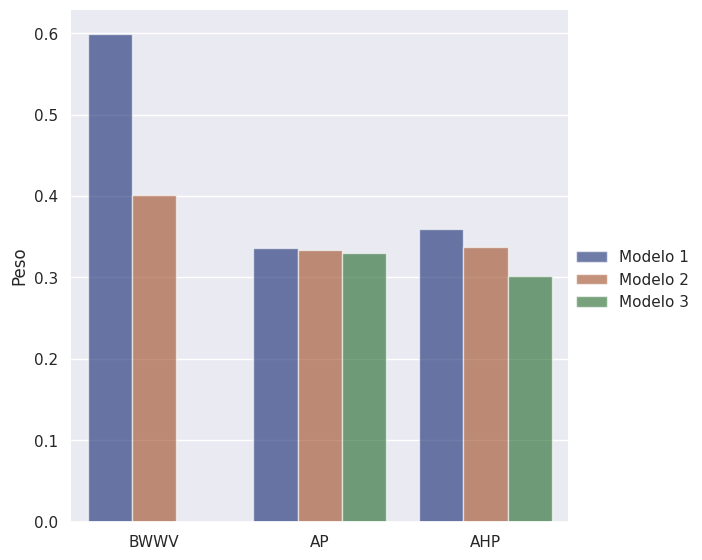

In [ ]:
'''
Compara os pesos obtidos pelas abordagens mencionadas
'''
data = []
data.append(['BWWV','Modelo 1', w_BWWV[0]])
data.append(['BWWV','Modelo 2', w_BWWV[1]])
data.append(['BWWV','Modelo 3', w_BWWV[2]])

data.append(['AP','Modelo 1', w_AP[0]])
data.append(['AP','Modelo 2', w_AP[1]])
data.append(['AP','Modelo 3', w_AP[2]])

data.append(['AHP','Modelo 1', u_AHP[0]])
data.append(['AHP','Modelo 2', u_AHP[1]])
data.append(['AHP','Modelo 3', u_AHP[2]])

df = pd.DataFrame(data=data, columns=['Metodo','Modelo','Peso'])

sns.set(rc={"figure.dpi":100})

g = sns.catplot(
    data=df, kind="bar",
    x="Metodo", y="Peso", hue="Modelo",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Peso")
g.legend.set_title("")

**Comparação das Métodos**

**Caso:** Mesmo algoritmo com hiperparâmetros distintos

In [ ]:
'''
Cria um dataframe com todos os resultados para melhor comparação
'''
df = pd.DataFrame(data=RESULTADOS1, columns=['Método','Acc','Pr','Re','Er'])
display(df)

,Método,Acc,Pr,Re,Er
0,KNN k=5,0.939167,0.939274,0.939180,1825
1,KNN k=30,0.934167,0.934612,0.934204,1975
2,KNN k=80,0.924033,0.924812,0.924087,2279
3,Ensemble suave sem pesos,0.937967,0.938467,0.937999,1861
4,Ensemble suave BWWV,0.939533,0.939857,0.939553,1814
5,Ensemble suave AP,0.938000,0.938494,0.938032,1860
6,Ensemble suave AHP,0.938567,0.939045,0.938595,1843


# **Abordagem 2:** Diferentes algoritmos

In [ ]:
#Para armazenar todos os resultados
RESULTADOS2 = []

#Defini os hiperparâmetros dos classificadores
clf1 = SVC(random_state=0, probability=True)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = LogisticRegression(random_state=0)
clf4 = MLPClassifier(random_state=0, max_iter=1000)

#Cria um dicionário com os nomes dos classficadores
dc2 = {'SVM': clf1, 'Arv. Decisão': clf2, 'Reg. Logística': clf3, 'MLP:': clf4}

#Calcula as métricas dos classificadores e os armazena na lista clfs
clfs2   = []
accs2   = []
prs2    = []
res2    = []
errors2 = []

for txt, clf in dc2.items():
    clfs2.append((txt, clf))
    acc, pr, re, er = fit_predict(X_train, X_test, y_test, y_train, clf, txt)
    RESULTADOS2.append([txt, acc, pr, re, er])
    accs2.append(acc)
    prs2.append(pr)
    res2.append(re)
    errors2.append(er)
    print('\n')

SVM
Acc: 0.9435
Pr: 0.9436
Re: 0.9435
Err: 1696


Arv. Decisão
Acc: 0.8011
Pr: 0.8011
Re: 0.8012
Err: 5966


Reg. Logística
Acc: 0.5660
Pr: 0.5659
Re: 0.5660
Err: 13020


MLP:
Acc: 0.9741
Pr: 0.9741
Re: 0.9741
Err: 776




In [ ]:
'''
Calcula os pesos considerando os métodos mencionados anteriormente
'''
#Metodologias clássicas
w_BWWV = BWWV(errors2)
w_AP  = AP(accs2)

#Metodologia proposta
errors_inv2 = list(1/np.array(errors2)) #Altera os erros para que seja considerado quanto mais pior
A          = np.array([accs2, prs2, res2, errors_inv2]).T
u_AHP      = AHP(A, np.array([1, 1, 1, 10]))

print('Pesos')
print('BWWV: ', np.round(w_BWWV, 4))
print('AP: ', np.round(w_AP, 4))
print('AHP : ', np.round(u_AHP, 4))

Pesos
BWWV:  [0.3698 0.2304 0.     0.3998]
AP :  [0.2872 0.2439 0.1723 0.2966]
AHP :  [0.28   0.117  0.0676 0.5354]


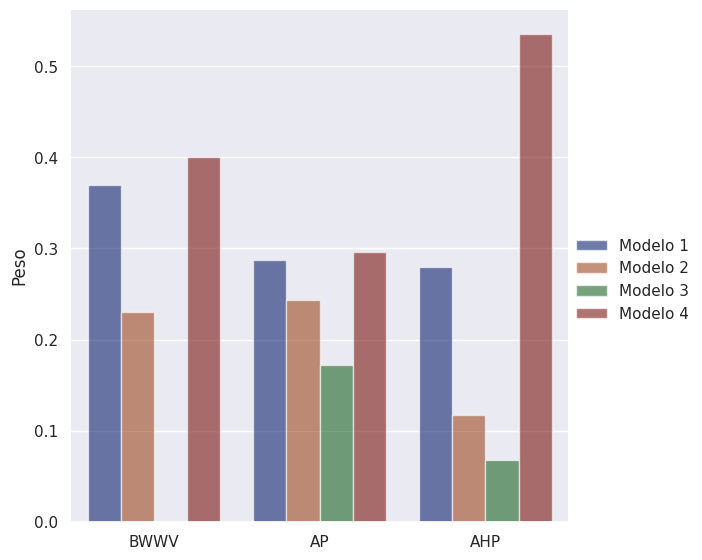

In [ ]:
'''
Compara os pesos obtidos pelas abordagens mencionadas
'''

data = []
data.append(['BWWV','Modelo 1', w_BWWV[0]])
data.append(['BWWV','Modelo 2', w_BWWV[1]])
data.append(['BWWV','Modelo 3', w_BWWV[2]])
data.append(['BWWV','Modelo 4', w_BWWV[3]])

data.append(['AP','Modelo 1', w_AP[0]])
data.append(['AP','Modelo 2', w_AP[1]])
data.append(['AP','Modelo 3', w_AP[2]])
data.append(['AP','Modelo 4', w_AP[3]])

data.append(['AHP','Modelo 1', u_AHP[0]])
data.append(['AHP','Modelo 2', u_AHP[1]])
data.append(['AHP','Modelo 3', u_AHP[2]])
data.append(['AHP','Modelo 4', u_AHP[3]])

df = pd.DataFrame(data=data, columns=['Metodo','Modelo','Peso'])

sns.set(rc={"figure.dpi":100})

g = sns.catplot(
    data=df, kind="bar",
    x="Metodo", y="Peso", hue="Modelo",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Peso")
g.legend.set_title("")

In [ ]:
'''
Emprega os Ensembles com e sem os pesos
'''

#Emprega Ensemble no modo suave sem considerar os pesos dos classificadores
voting = VotingClassifier(estimators=clfs2, voting='soft')
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print('\nEnsemble - Suave - Sem pesos')
acc_, pr_, re_, zol_ = metrics(y_test, y_pred)

RESULTADOS2.append(['Ensemble suave sem pesos', acc_, pr_, re_, zol_])

#Implementa o Ensemble com pesos obtidos pelo método BWWV
voting_BWWV = VotingClassifier(estimators=clfs2, voting='soft', weights=list(w_BWWV))
voting_BWWV.fit(X_train, y_train)
y_pred_BWWV = voting_BWWV.predict(X_test)

print('\nEnsemble - Suave - BWWV')
acc_BWWV, pr_BWWV, re_BWWV, zol_BWWV = metrics(y_test, y_pred_BWWV)

RESULTADOS2.append(['Ensemble suave BWWV', acc_BWWV, pr_BWWV, re_BWWV, zol_BWWV])

#Implementa o Ensemble com pesos obtidos pelo método AP
voting_AP = VotingClassifier(estimators=clfs2, voting='soft', weights=list(w_AP))
voting_AP.fit(X_train, y_train)
y_pred_AP = voting_AP.predict(X_test)

print('\nEnsemble - Suave - AP')
acc_AP, pr_AP, re_AP, zol_AP = metrics(y_test, y_pred_AP)

RESULTADOS2.append(['Ensemble suave AP', acc_AP, pr_AP, re_AP, zol_AP])

#Implementa o Ensemble com pesos obtidos pelo método AP
voting_AHP = VotingClassifier(estimators=clfs2, voting='soft', weights=list(u_AHP))
voting_AHP.fit(X_train, y_train)
y_pred_AHP = voting_AHP.predict(X_test)

print('\nEnsemble - Suave - AHP')
acc_AHP, pr_AHP, re_AHP, zol_AHP = metrics(y_test, y_pred_AHP)

RESULTADOS2.append(['Ensemble suave AHP', acc_AHP, pr_AHP, re_AHP, zol_AHP])


Ensemble - Suave - Sem pesos
Acc: 0.9475
Pr: 0.9476
Re: 0.9475
Err: 1575

Ensemble - Suave - BWWV
Acc: 0.9645
Pr: 0.9645
Re: 0.9645
Err: 1064

Ensemble - Suave - AP
Acc: 0.9560
Pr: 0.9561
Re: 0.9560
Err: 1319

Ensemble - Suave - AHP
Acc: 0.9733
Pr: 0.9733
Re: 0.9733
Err: 801


In [ ]:
'''
Cria um dataframe com todos os resultados para melhor comparação
'''
df = pd.DataFrame(data=RESULTADOS2, columns=['Método','Acc','Pr','Re','Er'])
display(df)

,Método,Acc,Pr,Re,Er
0,SVM,0.943467,0.943630,0.943499,1696
1,Arv. Decisão,0.801133,0.801143,0.801172,5966
2,Reg. Logística,0.566000,0.565950,0.565958,13020
3,MLP:,0.974133,0.974142,0.974143,776
4,Ensemble suave sem pesos,0.947500,0.947556,0.947507,1575
5,Ensemble suave BWWV,0.964533,0.964544,0.964544,1064
6,Ensemble suave AP,0.956033,0.956053,0.956050,1319
7,Ensemble suave AHP,0.973300,0.973304,0.973312,801


# **Abordagem 3:** Subespaço de atributos

Para essa abordagem particionamos o conjunto de dados.

In [ ]:
'''
Cria um conjunto de dados artificiais para classificação
'''

#Fixa a quantidade de amostras, features e classes
N_SAMPLES  = 50000
N_FEATURES = 30
N_CLASSES  = 4

#Cria os dados
X, y = make_classification(
        n_samples=N_SAMPLES, 
        n_features=N_FEATURES, 
        n_informative=N_FEATURES, 
        n_classes=N_CLASSES, 
        n_redundant=0, 
        random_state=0)

#Particiona os dados
X_1 = X[:, 0:9]
X_2 = X[:, 10:19]
X_3 = X[:, 20:29]

#Separa em treinamento e teste
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)

#Separa em treinamento e teste
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=0)

#Separa em treinamento e teste
X_3_train, X_3_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=0)

In [ ]:
'''
Exemplo de modelos com estrutura interna igual
Mas que usam atributos diferentes
Assim, cada modelo aprende em um espaço de atributos distinto
'''

#Para armazenar todos os resultados
RESULTADOS3 = []

#Defini os hiperparâmetros dos classificadores
clf1 = GaussianNB()
clf2 = GaussianNB()
clf3 = GaussianNB()

#Cria um dicionário com os nomes dos classficadores
dc3 = {'GNB Attr 1': clf1, 'GNB Attr 2': clf2, 'GNB Attr 3': clf3}

#Calcula as métricas dos classificadores e os armazena na lista clfs
clfs3  = []
accs   = []
prs    = []
res    = []
errors = []

clfs3.append(('GNB Attr 1', clf1))
acc, pr, re, er = fit_predict(X_1_train, X_1_test, y_test, y_train, clf1, 'GNB Attr 1')
RESULTADOS3.append(['GNB Attr 1', acc, pr, re, er])
accs.append(acc)
prs.append(pr)
res.append(re)
errors.append(er)
print('\n')

clfs3.append(('GNB Attr 2', clf2))
acc, pr, re, er = fit_predict(X_2_train, X_2_test, y_test, y_train, clf2, 'GNB Attr 2')
RESULTADOS3.append(['GNB Attr 2', acc, pr, re, er])
accs.append(acc)
prs.append(pr)
res.append(re)
errors.append(er)
print('\n')

clfs3.append(('GNB Attr 3', clf3))
acc, pr, re, er = fit_predict(X_3_train, X_3_test, y_test, y_train, clf3, 'GNB Attr 3')
RESULTADOS3.append(['GNB Attr 3', acc, pr, re, er])
accs.append(acc)
prs.append(pr)
res.append(re)
errors.append(er)
print('\n')


KNN Attr 1
Acc: 0.4469
Pr: 0.4453
Re: 0.4473
Err: 8296


KNN Attr 2
Acc: 0.4155
Pr: 0.4153
Re: 0.4160
Err: 8767


KNN Attr 3
Acc: 0.4704
Pr: 0.4734
Re: 0.4704
Err: 7944




In [ ]:
'''
Calcula os pesos considerando os métodos mencionados anteriormente
'''

#Metodologias clássicas
w_BWWV = BWWV(errors)
w_AP  = AP(accs)

#Metodologia proposta
errors_inv = list(1/np.array(errors)) #Altera os erros para que seja considerado quanto mais pior
A          = np.array([accs, prs, res, errors_inv]).T
u_AHP      = AHP(A)

print('Pesos')
print('BWWV: ', np.round(w_BWWV, 4))
print('AP: ', np.round(w_AP, 4))
print('AHP : ', np.round(u_AHP, 4))

Pesos
BWWV:  [0.364 0.    0.636]
AP :  [0.3353 0.3118 0.3529]
AHP :  [0.3347 0.3129 0.3524]


In [ ]:
'''
Emprega os Ensembles com e sem os pesos
'''

def ensemble_soft(clfs, X_tests, y_test, W):

    y_pred_1 = clfs[0][1].predict_proba(X_tests[0])
    y_pred_2 = clfs[1][1].predict_proba(X_tests[1])
    y_pred_3 = clfs[2][1].predict_proba(X_tests[2])
    ens = W[0] * y_pred_1 + W[1] * y_pred_2 + W[2] * y_pred_3
    
    #Prediz a classe que tem a maior probabilidade
    y_pred = np.argmax(ens, axis=1)

    #Calcula as métricas
    acc_, pr_, re_, zol_ = metrics(y_test, y_pred)

    return acc_, pr_, re_, zol_

#Conjuntos de teste
X_tests = [X_1_test, X_2_test, X_3_test]

#Implementa o Ensemble sem pesos
print('\nEnsemble - Suave - Sem pesos')
acc_, pr_, re_, zol_ = ensemble_soft(clfs3, X_tests, y_test, np.array([1, 1, 1]))

RESULTADOS3.append(['Ensemble suave sem pesos', acc_, pr_, re_, zol_])

#Implementa o Ensemble com pesos obtidos pelo método BWWV
print('\nEnsemble - Suave - BWWV')
acc_BWWV, pr_BWWV, re_BWWV, zol_BWWV = ensemble_soft(clfs3, X_tests, y_test, w_BWWV)

RESULTADOS3.append(['Ensemble suave BWWV', acc_BWWV, pr_BWWV, re_BWWV, zol_BWWV])

#Implementa o Ensemble com pesos obtidos pelo método AP
print('\nEnsemble - Suave - AP')
acc_AP, pr_AP, re_AP, zol_AP = ensemble_soft(clfs3, X_tests, y_test, w_AP)

RESULTADOS3.append(['Ensemble suave AP', acc_AP, pr_AP, re_AP, zol_AP])

#Implementa o Ensemble com pesos obtidos pelo método AP
print('\nEnsemble - Suave - AHP')
acc_AHP, pr_AHP, re_AHP, zol_AHP = ensemble_soft(clfs3, X_tests, y_test, u_AHP)

RESULTADOS3.append(['Ensemble suave AHP', acc_AHP, pr_AHP, re_AHP, zol_AHP])


Ensemble - Suave - Sem pesos
Acc: 0.5961
Pr: 0.5968
Re: 0.5965
Err: 6059

Ensemble - Suave - BWWV
Acc: 0.5467
Pr: 0.5472
Re: 0.5469
Err: 6799

Ensemble - Suave - AP
Acc: 0.5975
Pr: 0.5982
Re: 0.5979
Err: 6037

Ensemble - Suave - AHP
Acc: 0.5978
Pr: 0.5985
Re: 0.5982
Err: 6033


In [ ]:
'''
Cria um dataframe com todos os resultados para melhor comparação
'''
df = pd.DataFrame(data=RESULTADOS3, columns=['Método','Acc','Pr','Re','Er'])
display(df)

,Método,Acc,Pr,Re,Er
0,KNN Attr 1,0.446933,0.445305,0.447268,8296
1,KNN Attr 2,0.415533,0.415304,0.416029,8767
2,KNN Attr 3,0.470400,0.473421,0.470359,7944
3,Ensemble suave sem pesos,0.596067,0.596762,0.596451,6059
4,Ensemble suave BWWV,0.546733,0.547200,0.546922,6799
5,Ensemble suave AP,0.597533,0.598235,0.597903,6037
6,Ensemble suave AHP,0.597800,0.598527,0.598171,6033


# **Referências**

[1] Dietterich, T. G. Ensemble methods in machine learning. Lecture Notes in Computer Science, p. 1-15, 2000. (https://www.cin.ufpe.br/~mcps/AM/BIB/ensemble.pdf)

[2] Moreno-Seco, F., Iñesta, J.M., de Le´on, P.J.P., Mic´o, L., 2006. Comparison of
classifier fusion methods for classification in pattern recognition tasks, in:
Yeung, D.Y., Kwok, J.T., Fred, A., Roli, F., de Ridder, D. (Eds.), Structural,
Syntactic, and Statistical Pattern Recognition, Springer Berlin Heidelberg,
Berlin, Heidelberg. pp. 705–713. 

[3] de Oliveira, B. R., de Abreu, C. C. E., Duarte, M. A. Q., & Vieira Filho, J. (2019). Geometrical features for premature ventricular contraction recognition with analytic hierarchy process based machine learning algorithms selection. Computer methods and programs in biomedicine, 169, 59-69. https://doi.org/10.1016/j.cmpb.2018.12.028 
